# Differential Expression Analysis in GenePattern Notebook

Find genes that are significantly differentially expressed between classes of samples.

## Before you begin

* Sign in to GenePattern by entering your username and password into the form below. 
* Gene expression data must be in a [GCT or RES file](https://genepattern.broadinstitute.org/gp/pages/protocols/GctResFiles.html).
    * Example file: [all_aml_test.gct](https://datasets.genepattern.org/data/all_aml/all_aml_test.gct).
* The class of each sample must be identified in a [CLS file](https://genepattern.broadinstitute.org/gp/pages/protocols/ClsFiles.html).
    * Example file: [all_aml_test.cls](https://datasets.genepattern.org/data/all_aml/all_aml_test.cls).
* Learn more by reading about [file formats](http://www.broadinstitute.org/cancer/software/genepattern/file-formats-guide#GCT).


In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Step 0: Import data from GEO

In [8]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

In [9]:
geoimporter_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00042')
geoimporter_job_spec = geoimporter_task.make_job_spec()
geoimporter_job_spec.set_parameter("GEO.accession", "GSE51997")
geoimporter_job_spec.set_parameter("GEO.SOFT.file", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run5590853667809974504.tmp/GSE51997_family.soft.gz")
geoimporter_job_spec.set_parameter("Drop.NA.Rows", "TRUE")
geoimporter_job_spec.set_parameter("data.column.name", "VALUE")
geoimporter_job_spec.set_parameter("output.filename", "<GEO.accession><GEO.SOFT.file_basename>")
geoimporter_job_spec.set_parameter("ftp.proxy.server", "")
geoimporter_job_spec.set_parameter("ftp.proxy.username", "")
geoimporter_job_spec.set_parameter("ftp.proxy.password", "")
geoimporter_job_spec.set_parameter("http.proxy.server", "")
geoimporter_job_spec.set_parameter("http.proxy.username", "")
geoimporter_job_spec.set_parameter("http.proxy.password", "")
geoimporter_job_spec.set_parameter("job.memory", "2Gb")
geoimporter_job_spec.set_parameter("job.walltime", "02:00:00")
geoimporter_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(geoimporter_task)

job479105 = gp.GPJob(genepattern.session.get(0), 479105)
genepattern.display(job479105)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00042')

GPJobWidget(job_number=479105)

## Step 1: PreprocessDataset

Preprocess gene expression data to remove platform noise and genes that have little variation. You can test this step by starting a job using parameters entered into the form below.

### Considerations

* PreprocessDataset can preprocess the data in one or more ways (in this order):
    1. Set threshold and ceiling values. Any value lower/higher than the threshold/ceiling value is reset to the threshold/ceiling value.
    2. Convert each expression value to the log base 2 of the value.
    3. Remove genes (rows) if a given number of its sample values are less than a given threshold.
    4. Remove genes (rows) that do not have a minimum fold change or expression variation.
    5. Discretize or normalize the data.
* ComparativeMarkerSelection expects non-log-transformed data. Some calculations, such as Fold Change, will produce incorrect results on log transformed data.
* If you did not generate the expression data, check whether preprocessing steps have already been taken before running the PreprocessDataset module.
* Learn more by reading about the [PreprocessDataset](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=PreprocessDataset) module.

<div class="alert alert-info">
<h3 style="position: relative; top: -10px">Instructions</h3>
Click the *Run* button on the analysis below.</div>

In [10]:
preprocessdataset_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020')
preprocessdataset_job_spec = preprocessdataset_task.make_job_spec()
preprocessdataset_job_spec.set_parameter("input.filename", "https://cloud.genepattern.org/gp/jobResults/479105/GSE51997GSE51997_family.soft.gct")
preprocessdataset_job_spec.set_parameter("threshold.and.filter", "0")
preprocessdataset_job_spec.set_parameter("floor", "20")
preprocessdataset_job_spec.set_parameter("ceiling", "20000")
preprocessdataset_job_spec.set_parameter("min.fold.change", "3")
preprocessdataset_job_spec.set_parameter("min.delta", "100")
preprocessdataset_job_spec.set_parameter("num.outliers.to.exclude", "0")
preprocessdataset_job_spec.set_parameter("row.normalization", "0")
preprocessdataset_job_spec.set_parameter("row.sampling.rate", "1")
preprocessdataset_job_spec.set_parameter("threshold.for.removing.rows", "")
preprocessdataset_job_spec.set_parameter("number.of.columns.above.threshold", "")
preprocessdataset_job_spec.set_parameter("log2.transform", "1")
preprocessdataset_job_spec.set_parameter("output.file.format", "3")
preprocessdataset_job_spec.set_parameter("output.file", "<input.filename_basename>.log2_.preprocessed")
genepattern.display(preprocessdataset_task)

job479284 = gp.GPJob(genepattern.session.get(0), 479284)
genepattern.display(job479284)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020')

GPJobWidget(job_number=479108)

## Step 1.5: Create CLS File for phenote type

In [11]:
clsfilecreator_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00261')
clsfilecreator_job_spec = clsfilecreator_task.make_job_spec()
clsfilecreator_job_spec.set_parameter("input.file", "https://cloud.genepattern.org/gp/jobResults/479105/GSE51997GSE51997_family.soft.gct")
clsfilecreator_job_spec.set_parameter("job.memory", "2Gb")
clsfilecreator_job_spec.set_parameter("job.walltime", "02:00:00")
clsfilecreator_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(clsfilecreator_task)

job479109 = gp.GPJob(genepattern.session.get(0), 479109)
genepattern.display(job479109)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00261')

GPJobWidget(job_number=479109)

## Step 2: ComparativeMarkerSelection

ComparativeMarkerSelection computes differential gene expression. For each gene, it uses a test statistic to calculate the difference in gene expression between classes and then computes a p-value to estimate the significance of the test statistic score.

Because testing tens of thousands of genes simultaneously increases the possibility of mistakenly identifying a non-marker gene as a marker gene (a false positive), ComparativeMarkerSelection corrects for multiple hypothesis testing by computing both false discovery rates (FDR) and family-wise error rates (FWER). 

### Considerations

* If the data set includes at least 10 samples per class, use the default value of 1000 permutations to ensure accurate p-values. If the data set includes fewer than 10 samples in any class, permuting the samples cannot give an accurate p-value; specify 0 permutations to use asymptotic p-values instead.
* If the data set includes more than two classes, use the phenotype test parameter to analyze each class against all others (one-versus-all) or all class pairs (all pairs).
* Learn more by reading about the [ComparativeMarkerSelection](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=ComparativeMarkerSelection) module.


<div class="alert alert-info">
<h3>Instructions</h3>
<p>After the PreprocessDataset job above finishes running, send the GCT result of that job to ComparativeMarkerSelection below. To do this either drag-and-drop the link for the file above to the *input.file* input below, or click the link for the file above and select *Send to an Existing GenePattern Cell > ComparativeMarkerSelection* in the menu that appears.</p>

<p>For your convenience, the necessary CLS file for ComparativeMarkerSelection is already supplied for the analysis below. Once this is done, click *Run* for the analysis below.</p>
</div>

In [12]:
comparativemarkerselection_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00044')
comparativemarkerselection_job_spec = comparativemarkerselection_task.make_job_spec()
comparativemarkerselection_job_spec.set_parameter("input.file", "https://cloud.genepattern.org/gp/jobResults/479284/GSE51997GSE51997_family.soft.log2_.preprocessed.gct")
comparativemarkerselection_job_spec.set_parameter("cls.file", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run2744313410993221294.tmp/GSE51997GSE51997_family.soft.cls")
comparativemarkerselection_job_spec.set_parameter("confounding.variable.cls.file", "")
comparativemarkerselection_job_spec.set_parameter("test.direction", "2")
comparativemarkerselection_job_spec.set_parameter("test.statistic", "0")
comparativemarkerselection_job_spec.set_parameter("min.std", "")
comparativemarkerselection_job_spec.set_parameter("number.of.permutations", "10000")
comparativemarkerselection_job_spec.set_parameter("log.transformed.data", "true")
comparativemarkerselection_job_spec.set_parameter("complete", "false")
comparativemarkerselection_job_spec.set_parameter("balanced", "false")
comparativemarkerselection_job_spec.set_parameter("random.seed", "779948241")
comparativemarkerselection_job_spec.set_parameter("smooth.p.values", "true")
comparativemarkerselection_job_spec.set_parameter("phenotype.test", "one versus all")
comparativemarkerselection_job_spec.set_parameter("output.filename", "<input.file_basename>.comp.marker.odf")
genepattern.display(comparativemarkerselection_task)

job479286 = gp.GPJob(genepattern.session.get(0), 479286)
genepattern.display(job479286)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00044')

GPJobWidget(job_number=479113)

## Step 3: ComparativeMarkerSelectionViewer

Run the ComparativeMarkerSelectionViewer module to view the results. The viewer displays the test statistic score, its p value, two FDR statistics and three FWER statistics for each gene. 

### Considerations

* Generally, researchers identify marker genes based on FDR rather than the more conservative FWER.
* Often, marker genes are identified based on an FDR cutoff value of .05, which indicates that a gene identified as a marker gene has a 1 in 20 (5%) chance of being a false positive. Select Edit>Filter Features>Custom Filter to filter results based on that criteria (or any other).
* Learn more by reading about the [ComparativeMarkerSelectionViewer](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=ComparativeMarkerSelectionViewer) module.

<div class="alert alert-info">
<h3>Instructions</h3>
<p>After the ComparativeMarkerSelection job above finishes, send the ODF result of that job to ComparativeMarkerSelectionViewer below. This can be achieved in a method similar to the one described in the last step.</p>
<p>Once this is accomplished, go back up to the PreprocessDataset job and also send its GCT output to ComparativeMarkerSelectionViewer.</p>

<p>Once both files are sent, click *Run* for the analysis below. Once the job downloads the necessary data it should display a visualization of the differential expression results.</p>
</div>

In [13]:
comparativemarkerselectionviewer_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00045')
comparativemarkerselectionviewer_job_spec = comparativemarkerselectionviewer_task.make_job_spec()
comparativemarkerselectionviewer_job_spec.set_parameter("comparative.marker.selection.filename", "")
comparativemarkerselectionviewer_job_spec.set_parameter("dataset.filename", "https://cloud.genepattern.org/gp/jobResults/479284/GSE51997GSE51997_family.soft.log2_.preprocessed.gct")
genepattern.display(comparativemarkerselectionviewer_task)

job479289 = gp.GPJob(genepattern.session.get(0), 479289)
genepattern.display(job479289)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00045')

GPJobWidget(job_number=479121)

In [15]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
from gp.data import ODF
gse51997gse51997_family_soft_log2_preprocessed_comp_marker_odf_479286 = ODF(job479286.get_file("GSE51997GSE51997_family.soft.log2_.preprocessed.comp.marker.odf"))
gse51997gse51997_family_soft_log2_preprocessed_comp_marker_odf_479286

/opt/conda/envs/python3.6/lib/python3.6/site-packages/gp/data.py:208: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dataframe = df
/opt/conda/envs/python3.6/lib/python3.6/site-packages/gp/data.py:304: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers


,Rank,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,SLE Mean,SLE Std,NDs Mean,NDs Std,k
0,1,210649_s_at,AF231056,14.587440,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,1.225175,7.297148,0.200611,6.071973,0.303228,0
1,2,212193_s_at,BE881529,14.554229,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,1.677672,7.017510,0.366016,5.339837,0.286006,0
2,4,213490_s_at,AI762811,12.935844,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,1.671022,6.183820,0.245209,4.512798,0.522135,0
3,5,200634_at,NM_005022,12.726124,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,1.215357,11.907963,0.177940,10.692606,0.388451,0
4,6,219878_s_at,NM_015995,12.700822,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,1.062369,9.028105,0.242111,7.965736,0.248620,0
5,7,208829_at,AF029750,12.508447,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,1.037700,10.018794,0.248540,8.981094,0.233112,0
6,8,202757_at,NM_015456,12.297480,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,0.800718,7.808948,0.175496,7.008230,0.211834,0
7,9,224626_at,BE618656,12.245203,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,1.010123,7.163979,0.195818,6.153856,0.299082,0
8,10,227558_at,AI570531,12.108007,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,0.665794,10.780786,0.135040,10.114993,0.194588,0
9,11,211992_at,AI445745,12.032692,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,0.722456,9.342577,0.182841,8.620121,0.163629,0


In [16]:
id_refs = {
    'ELF1': ['212420','212418'],
    'IRF1': ['202531','238725'],
    'SYNGR1': ['204287','210613','213854'],
    'UNC5A': ['236448','243833'],
    'MT1F': ['213629','217165'],
}

def get_target_gene_ranking(gene_list,df):
    finding_result = pd.DataFrame(columns=df.columns)
    for gene_name, gene_id in gene_list.items():
        target_gene = df[(df['Feature'].str.contains(gene_id[0]))|(df['Feature'].str.contains(gene_id[1]))]
        finding_result = finding_result.append(target_gene)
#         finding_result['Gene_Name'] = gene_name
    return finding_result

In [17]:
# filter gene by FDR and get new ranking
df1 = gse51997gse51997_family_soft_log2_preprocessed_comp_marker_odf_479286
df1_new = df1[(df1['FDR(BH)'] <= 0.2)]
df1_new.insert(loc=1, column="Rank_2", value=list(df1_new['Score'].abs().rank(ascending=False)))
df1_new.loc[:,'Rank_2'] = df1_new['Rank_2'].astype(int)
df1_new

/opt/conda/envs/python3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Rank,Rank_2,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,SLE Mean,SLE Std,NDs Mean,NDs Std,k
0,1,1,210649_s_at,AF231056,14.587440,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,1.225175,7.297148,0.200611,6.071973,0.303228,0
1,2,2,212193_s_at,BE881529,14.554229,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,1.677672,7.017510,0.366016,5.339837,0.286006,0
2,4,4,213490_s_at,AI762811,12.935844,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,1.671022,6.183820,0.245209,4.512798,0.522135,0
3,5,5,200634_at,NM_005022,12.726124,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,1.215357,11.907963,0.177940,10.692606,0.388451,0
4,6,6,219878_s_at,NM_015995,12.700822,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,1.062369,9.028105,0.242111,7.965736,0.248620,0
5,7,7,208829_at,AF029750,12.508447,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,1.037700,10.018794,0.248540,8.981094,0.233112,0
6,8,8,202757_at,NM_015456,12.297480,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,0.800718,7.808948,0.175496,7.008230,0.211834,0
7,9,9,224626_at,BE618656,12.245203,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,1.010123,7.163979,0.195818,6.153856,0.299082,0
8,10,10,227558_at,AI570531,12.108007,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,0.665794,10.780786,0.135040,10.114993,0.194588,0
9,11,11,211992_at,AI445745,12.032692,0.0002,0.0,0.000299,0.00699,0.006483,1.0,0.0000,0.0000,0.722456,9.342577,0.182841,8.620121,0.163629,0


In [20]:
get_target_gene_ranking(id_refs,df1)

,Rank,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,SLE Mean,SLE Std,NDs Mean,NDs Std,k
8386,25420,212418_at,M82882,1.121480,0.276745,0.267891,0.285423,0.588641,0.409674,1.0,1.0000,1.0000,0.062547,11.009707,0.139924,10.947160,0.194072,1383
23324,50260,212420_at,AL559590,-0.149681,0.886223,0.879877,0.892325,0.961770,0.669334,1.0,1.0000,1.0000,0.016198,10.498512,0.292474,10.514710,0.351034,5569
1211,2605,202531_at,NM_002198,3.735498,0.000600,0.000121,0.000943,0.013769,0.010009,1.0,1.0000,1.0000,0.802091,10.024162,0.665366,9.222071,0.564468,2
20009,52533,238725_at,AW392551,0.070744,0.950610,0.946237,0.954733,0.985730,0.686001,1.0,1.0000,1.0000,0.017893,9.451849,0.796285,9.433956,0.641071,4753
12839,36952,210613_s_at,BC000731,0.627016,0.544491,0.534629,0.554148,0.797184,0.554830,1.0,1.0000,1.0000,0.517023,5.202063,2.245981,4.685040,2.651685,2722
29893,38171,204287_at,NM_004711,-0.580582,0.553089,0.543244,0.562730,0.803149,0.558958,1.0,1.0000,1.0000,0.191166,3.675270,1.023940,3.866435,0.858826,7235
2862,8123,243833_at,AI951556,2.443706,0.018996,0.016259,0.021587,0.129439,0.090207,1.0,1.0000,1.0000,0.869776,2.073919,1.043453,1.204143,1.037331,94
21477,53844,236448_at,R37358,-0.027765,0.996001,0.994630,0.997115,0.998741,0.695086,1.0,1.0000,1.0000,0.008628,0.630859,0.814344,0.639487,1.040314,5020
245,305,217165_x_at,M10943,6.675143,0.000200,0.000000,0.000299,0.006990,0.006483,1.0,0.0141,0.0141,1.036407,8.781400,0.399026,7.744993,0.529286,0
2057,5238,213629_x_at,BF246115,2.936895,0.009998,0.007992,0.011860,0.086494,0.060321,1.0,1.0000,1.0000,0.771600,8.022965,0.776324,7.251364,0.755969,49


In [21]:
get_target_gene_ranking(id_refs,df1_new)

,Rank,Rank_2,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,SLE Mean,SLE Std,NDs Mean,NDs Std,k
1211,2605,2605,202531_at,NM_002198,3.735498,0.000600,0.000121,0.000943,0.013769,0.010009,1.0,1.0000,1.0000,0.802091,10.024162,0.665366,9.222071,0.564468,2
2862,8123,8123,243833_at,AI951556,2.443706,0.018996,0.016259,0.021587,0.129439,0.090207,1.0,1.0000,1.0000,0.869776,2.073919,1.043453,1.204143,1.037331,94
245,305,305,217165_x_at,M10943,6.675143,0.000200,0.000000,0.000299,0.006990,0.006483,1.0,0.0141,0.0141,1.036407,8.781400,0.399026,7.744993,0.529286,0
2057,5238,5238,213629_x_at,BF246115,2.936895,0.009998,0.007992,0.011860,0.086494,0.060321,1.0,1.0000,1.0000,0.771600,8.022965,0.776324,7.251364,0.755969,49


## Extract Gene Expression Value for plotting

In [14]:
extractcomparativemarkerresults_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00046')
extractcomparativemarkerresults_job_spec = extractcomparativemarkerresults_task.make_job_spec()
extractcomparativemarkerresults_job_spec.set_parameter("comparative.marker.selection.filename", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run3723308982077976696.tmp/GSE51997GSE51997_family.soft.log2_.preprocessed.comp.marker.odf")
extractcomparativemarkerresults_job_spec.set_parameter("dataset.filename", "https://cloud.genepattern.org/gp/jobResults/479284/GSE51997GSE51997_family.soft.log2_.preprocessed.gct")
extractcomparativemarkerresults_job_spec.set_parameter("statistic", "FDR(BH)")
extractcomparativemarkerresults_job_spec.set_parameter("min", "0")
extractcomparativemarkerresults_job_spec.set_parameter("max", "1.0")
extractcomparativemarkerresults_job_spec.set_parameter("number.of.neighbors", "")
extractcomparativemarkerresults_job_spec.set_parameter("base.output.name", "<comparative.marker.selection.filename_basename>.filt")
extractcomparativemarkerresults_job_spec.set_parameter("job.memory", "2Gb")
extractcomparativemarkerresults_job_spec.set_parameter("job.walltime", "02:00:00")
extractcomparativemarkerresults_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(extractcomparativemarkerresults_task)

job479290 = gp.GPJob(genepattern.session.get(0), 479290)
genepattern.display(job479290)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00046')

GPJobWidget(job_number=479130)

In [22]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
from gp.data import GCT
gse51997gse51997_family_soft_log2_preprocessed_comp_marker_filt_gct_479290 = GCT(job479290.get_file("GSE51997GSE51997_family.soft.log2_.preprocessed.comp.marker.filt.gct"))
gse51997gse51997_family_soft_log2_preprocessed_comp_marker_filt_gct_479290

/opt/conda/envs/python3.6/lib/python3.6/site-packages/gp/data.py:208: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dataframe = df


,,GSM1256958,GSM1256959,GSM1256960,GSM1256961,GSM1256962,GSM1256963,GSM1256964,GSM1256965,GSM1256966,GSM1256967,...,GSM1256984,GSM1256985,GSM1256986,GSM1256987,GSM1256988,GSM1256989,GSM1256990,GSM1256991,GSM1256992,GSM1256993
Name,Description,,,,,,,,,,,,,,,,,,,,,
210649_s_at,AF231056,7.455541,7.695952,7.193575,7.555379,7.282412,7.351990,7.155689,7.401289,7.303297,7.321008,...,6.022239,6.026561,6.320089,6.128966,6.045838,6.053859,6.201802,6.058775,6.067555,5.955768
212193_s_at,BE881529,7.172398,7.267901,6.772770,6.942362,6.736957,6.257674,6.791554,6.882814,7.358027,6.996298,...,5.555034,5.363679,5.501598,5.493807,5.388048,5.445485,5.724694,5.833604,5.756124,5.246370
213490_s_at,AI762811,5.864761,6.322918,6.340393,5.960465,5.602647,6.202480,6.512104,6.083524,6.411057,6.367170,...,2.817048,3.874236,4.472039,4.793397,5.099506,4.676674,4.347907,4.398084,4.766394,4.713817
200634_at,NM_005022,12.263263,11.664136,11.854070,12.007048,11.549515,11.928489,12.009048,11.954214,11.908242,11.780257,...,10.702848,10.596395,10.581954,10.543989,11.153527,11.297965,11.444316,11.302862,11.078137,11.272688
219878_s_at,NM_015995,9.212141,9.520658,8.950559,8.870093,8.973037,9.059125,9.109818,9.162066,8.653479,8.960963,...,8.312629,8.165751,8.355787,7.868705,7.896986,7.954947,8.096657,8.080562,7.714349,7.680950
208829_at,AF029750,10.472224,10.072749,9.829258,10.002449,9.823617,9.693649,10.249398,10.247761,10.454515,9.974888,...,9.361369,8.982717,9.241228,9.025392,8.732527,8.540550,8.779368,8.831044,8.891522,8.749038
202757_at,NM_015456,8.045776,8.111746,7.630835,7.969847,7.748562,7.957404,7.609467,7.921942,7.771093,7.843029,...,7.304511,6.914983,6.858826,7.181421,7.082841,6.699829,6.975814,6.842639,6.721564,6.675393
224626_at,BE618656,7.410824,7.051122,6.937191,7.526390,7.062651,6.965022,7.417793,7.091372,6.991862,7.305806,...,6.094297,6.304778,6.132955,5.992138,5.862298,6.272792,6.309160,6.428174,6.246623,6.283075
227558_at,AI570531,10.924189,10.730394,10.832993,10.877752,10.499228,10.639702,10.744111,10.675543,10.771068,10.712536,...,9.835256,9.931358,9.903674,10.145767,9.974501,10.004080,10.374833,9.800185,10.010654,9.964084


In [23]:
GE_data = gse51997gse51997_family_soft_log2_preprocessed_comp_marker_filt_gct_479290.loc[:,'GSM1256971':]
GE_data

,,GSM1256971,GSM1256972,GSM1256973,GSM1256974,GSM1256975,GSM1256976,GSM1256977,GSM1256978,GSM1256979,GSM1256980,...,GSM1256984,GSM1256985,GSM1256986,GSM1256987,GSM1256988,GSM1256989,GSM1256990,GSM1256991,GSM1256992,GSM1256993
Name,Description,,,,,,,,,,,,,,,,,,,,,
210649_s_at,AF231056,7.325728,6.090491,6.242399,6.495797,5.290391,5.860720,5.972534,6.743084,5.665094,6.116257,...,6.022239,6.026561,6.320089,6.128966,6.045838,6.053859,6.201802,6.058775,6.067555,5.955768
212193_s_at,BE881529,7.377844,4.937839,5.047019,5.385024,5.150052,5.704305,5.159177,5.173903,5.484135,5.361393,...,5.555034,5.363679,5.501598,5.493807,5.388048,5.445485,5.724694,5.833604,5.756124,5.246370
213490_s_at,AI762811,6.378238,4.361038,4.528102,4.802509,4.082123,4.349457,4.293039,4.181826,5.092300,5.299039,...,2.817048,3.874236,4.472039,4.793397,5.099506,4.676674,4.347907,4.398084,4.766394,4.713817
200634_at,NM_005022,12.007062,10.414178,10.062316,10.470191,10.232025,10.388911,10.395556,10.377449,10.445718,10.654976,...,10.702848,10.596395,10.581954,10.543989,11.153527,11.297965,11.444316,11.302862,11.078137,11.272688
219878_s_at,NM_015995,9.168965,8.122088,7.800725,8.078135,7.366847,7.690173,7.675075,8.014707,7.774906,8.212744,...,8.312629,8.165751,8.355787,7.868705,7.896986,7.954947,8.096657,8.080562,7.714349,7.680950
208829_at,AF029750,9.757397,9.292993,8.746266,8.853450,8.846133,9.196098,8.923467,9.050344,9.137952,8.817108,...,9.361369,8.982717,9.241228,9.025392,8.732527,8.540550,8.779368,8.831044,8.891522,8.749038
202757_at,NM_015456,7.832656,6.957253,6.965403,6.975584,7.071033,7.223345,7.508920,6.883829,7.255642,6.781832,...,7.304511,6.914983,6.858826,7.181421,7.082841,6.699829,6.975814,6.842639,6.721564,6.675393
224626_at,BE618656,7.105311,6.338469,5.201497,6.024845,6.169983,5.968962,6.304799,6.300312,6.064394,5.802211,...,6.094297,6.304778,6.132955,5.992138,5.862298,6.272792,6.309160,6.428174,6.246623,6.283075
227558_at,AI570531,10.801490,10.490911,10.340874,10.303176,10.463913,10.159468,10.113534,10.195569,10.149125,9.944317,...,9.835256,9.931358,9.903674,10.145767,9.974501,10.004080,10.374833,9.800185,10.010654,9.964084


In [24]:
"""
Mapping IDs for ELF1 / IRF1 / SYNGR1  
"""

id_refs = {'GSE121239_family.soft.gz': 
           {'ELF1': ['212420_at', '212418_at'],
            'IRF1': ['202531_at'], 
            'SYNGR1': ['210613_s_at', '204287_at'],
            'UNC5A': ['236448_at', '243833_at'],
            'MT1F': ['213629_x_at', '217165_x_at']
           }
          } 
elf1 = id_refs['GSE121239_family.soft.gz']['ELF1'][0]
irf1 = id_refs['GSE121239_family.soft.gz']['IRF1'][0] 
syngr1 = id_refs['GSE121239_family.soft.gz']['SYNGR1'][1]
unc5a = id_refs['GSE121239_family.soft.gz']['UNC5A'][0]
mt1f = id_refs['GSE121239_family.soft.gz']['MT1F'][1]
gene_id_list = [elf1, irf1, unc5a, syngr1, mt1f]

In [25]:
GE_data_ = GE_data.reset_index().drop(columns='Description')
column_name_list = []

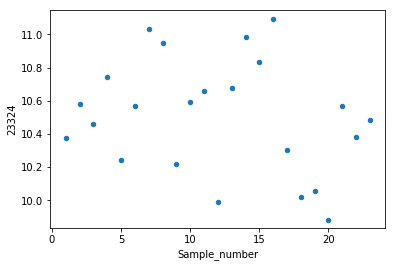

In [26]:
"""
ELF1 
""" 
df = GE_data_[GE_data_.Name==elf1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name,ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

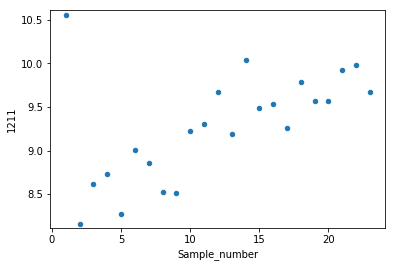

In [27]:
"""
IRF1 
""" 
df = GE_data_[GE_data_.Name==irf1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

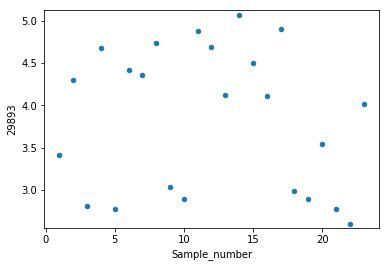

In [28]:
"""
SYNGR1
""" 
df = GE_data_[GE_data_.Name==syngr1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

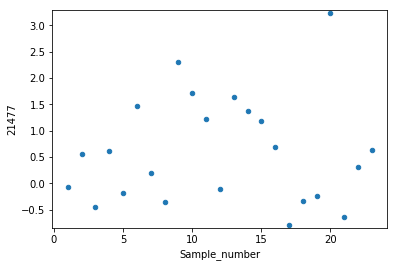

In [29]:
"""
UNC5A
""" 
df = GE_data_[GE_data_.Name==unc5a].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

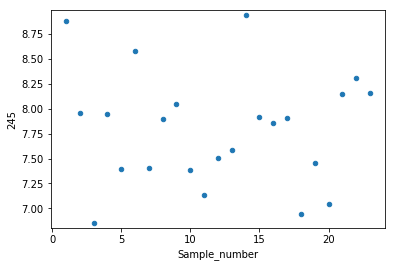

In [30]:
"""
MT1F
""" 
df = GE_data_[GE_data_.Name==mt1f].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

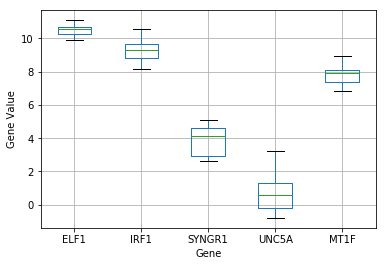

In [31]:
""" 
Box plot 
"""

df = GE_data_[GE_data_.Name.isin(gene_id_list)]
df = df.T.drop(['Name']) 
df = df.astype(float) 
df.boxplot(column=column_name_list).set_xticklabels(['ELF1', 'IRF1', 'SYNGR1','UNC5A','MT1F']) 
plt.xlabel("Gene")
plt.ylabel("Gene Value")

In [32]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
GE_data_['CV'] = GE_data_.apply(lambda row : cv(row.T.drop(['Name'])), axis = 1)  
GE_data_['Gene_number'] = range(1, len(GE_data_) + 1) 

(0, 150)

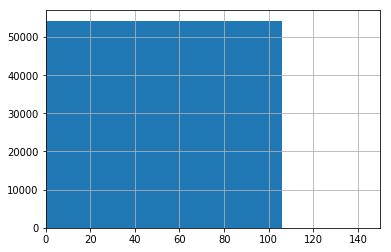

In [44]:
GE_data_['CV'].hist(bins=100).set_xlim(0,150)

In [34]:
for gene_ref_id in gene_id_list:
    print(GE_data_[GE_data_['Name']==gene_ref_id]['CV'] )

23324    0.032747
Name: CV, dtype: float64
1211    0.066579
Name: CV, dtype: float64
21477    1.688803
Name: CV, dtype: float64
29893    0.219494
Name: CV, dtype: float64
245    0.072968
Name: CV, dtype: float64


In [35]:
sorted_raw_expre = GE_data_.sort_values(by='CV', ascending=False).reset_index()

In [36]:
for gene_ref_id in gene_id_list:
    print("gene_ref_id",gene_ref_id)
    print(sorted_raw_expre[sorted_raw_expre['Name']==gene_ref_id].index)

gene_ref_id 212420_at
Int64Index([51134], dtype='int64')
gene_ref_id 202531_at
Int64Index([44617], dtype='int64')
gene_ref_id 236448_at
Int64Index([2796], dtype='int64')
gene_ref_id 204287_at
Int64Index([30570], dtype='int64')
gene_ref_id 217165_x_at
Int64Index([43506], dtype='int64')
